# Heart disease project

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [2]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
X_org = heart_data.drop(columns='target', axis=1)
y_org = heart_data['target']

In [7]:
X_org.shape

(1025, 13)

In [8]:
y_org.value_counts()

,count
target,
1,526
0,499


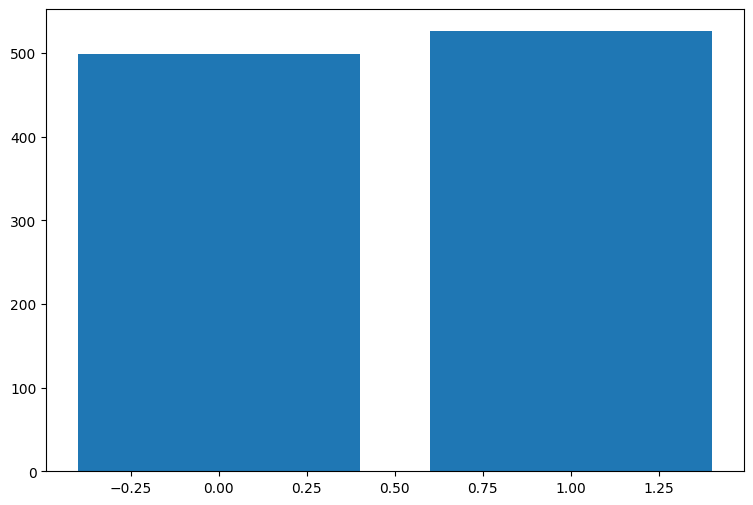

In [9]:
plt.figure(figsize=(9,6))
y = heart_data.target.value_counts()
plt.bar(y.index, y.values)
plt.show()

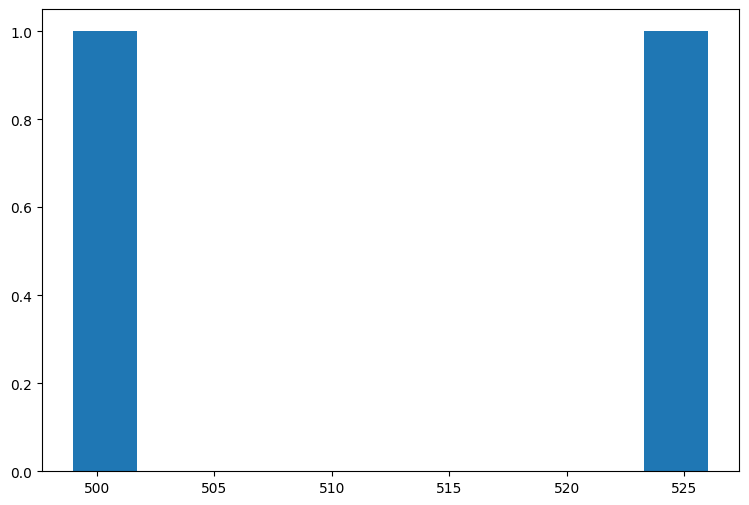

In [10]:
plt.figure(figsize=(9,6))
y = heart_data.target.value_counts()
plt.hist(y)
plt.show()

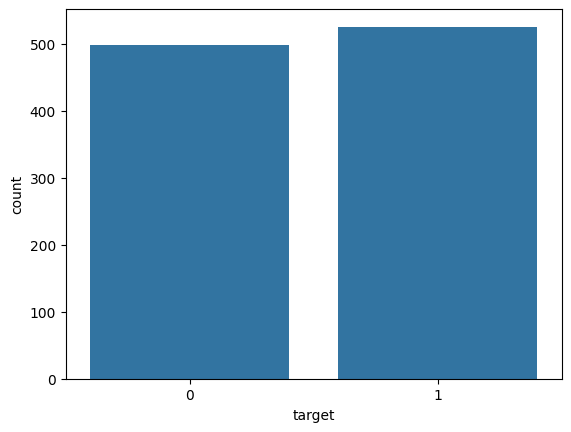

In [11]:
sns.barplot(y)
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_org,y_org,test_size=0.2,stratify=y_org,random_state=42)

In [13]:
x_train.shape

(820, 13)

In [14]:
x_test.shape

(205, 13)

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
# min max
min_max_scaler = MinMaxScaler()
x_train_min = min_max_scaler.fit_transform(x_train)
x_test_min = min_max_scaler.transform(x_test)

In [16]:
model = LogisticRegression()
model

LogisticRegression()

In [18]:
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
# min max
model.fit(x_train_min,y_train)

LogisticRegression()

In [19]:
x_train_pred = model.predict(x_train)
train_acc = accuracy_score(x_train_pred,y_train)
train_acc

0.8463414634146341

In [25]:
# min max
x_train_pred_min = model.predict(x_train_min)
train_acc = accuracy_score(x_train_pred_min,y_train)
train_acc

0.8414634146341463

In [21]:
x_test_pred = model.predict(x_test)
test_acc = accuracy_score(x_test_pred,y_test)
test_acc

0.8097560975609757

In [26]:
# min max
x_test_pred_min = model.predict(x_test)
test_acc = accuracy_score(x_test_pred_min,y_test)
test_acc

0.7853658536585366

In [27]:
input_data = (62, 0, 0, 138, 294, 1, 1, 106, 0,	1.9, 1, 3, 2)
input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1,-1)
input_data_reshaped = scaler.transform(input_data_reshaped)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
prediction = model.predict(input_data_reshaped)
print(prediction)
if prediction[0] == 0:
  print('Logistic Regression: The person does not have a herat disease')
else:
  print('Logistic Regression: The person has a heart disease')

[0]
Logistic Regression: The person does not have a herat disease


In [32]:
model_matrix = confusion_matrix(x_test_pred,y_test)
print(model_matrix)

[[70  9]
 [30 96]]


In [31]:
# Precision, Recall, and F1 score for the train data of logistic Regression model
precision = precision_score(y_train, x_train_pred)
f1 = f1_score(y_train, x_train_pred)
recall = recall_score(y_train, x_train_pred)

print('Precision on train data:', precision)
print('F1 score on train data:', f1)
print('Recall score on train data:', recall)

Precision on train data: 0.8131634819532909
F1 score on train data: 0.8587443946188341
Recall score on train data: 0.9097387173396675


In [34]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
